In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv("../archivos_editados/df_completo.csv")
df.shape

(25973, 72)

CREAMOS UN FATAFRAME NUEVO QUEDÁNDONOS SOLO CON LOS DATA Y BUSINESS ANALYST

In [4]:
df_data = df[(df["Q5"] == "Business Analyst") | (df ["Q5"] == "Data Analyst")]
df_data.head(5)

,index,Q3,Q4,Q5,Q6,Q8,Q15,Q20,Q21,Q23,Q25,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q34,age,gender,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER
16,16,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,50-54,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Synapse,NaN,NaN,NaN
32,32,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,22-24,Nonbinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,Egypt,Bachelor’s degree,Data Analyst,3-5 years,R,I do not use machine learning methods,Non-profit/Service,0-49 employees,No (we do not use ML methods),"7,500-9,999",NaN,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",Other,None,NaN,NaN,Analyze and understand data to influence produ...,None,30-34,Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,MySQL,NaN,SQLite,NaN,MongoDB,NaN,NaN,Microsoft SQL Server,Microsoft Azure SQL Database,Microsoft Azure Cosmos DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Some college/university study without earning ...,Data Analyst,< 1 years,Python,1-2 years,Computers/Technology,0-49 employees,No (we do not use ML methods),$0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,22-24,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBM Db2,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Firestore,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,Microsoft Azure Synapse,NaN,NaN,NaN
52,52,South Africa,Master’s degree,Data Analyst,1-3 years,R,1-2 years,Manufacturing/Fabrication,250-999 employees,No (we do not use ML methods),"25,000-29,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook",None,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,Microsoft Power BI,40-44,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

VAMOS A FILTRAR POR LA COLUMNA Q7 PARA VER LOS LENGUAJES MÁS UTILIZADOS

QUE LENGUAJES SE UTILIZAN MÁS

In [5]:
lista_lenguajes = ["Python", "R", "SQL", "C[^\+]", "C\+\+" ,"Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "Other", "None" ]


In [6]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [7]:
#CREAMOS UNA FUNCION PARA ITERAR POR TODA LA COLUMNA

def lenguajes (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [8]:
lista_valores = lenguajes(df_data["Q7"], lista_lenguajes)

In [9]:
lista_valores

[2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59]

In [10]:
lista_data = lista_lenguajes , lista_valores

In [11]:
lista_data

(['Python',
  'R',
  'SQL',
  'C[^\\+]',
  'C\\+\\+',
  'Java',
  'Javascript',
  'Julia',
  'Swift',
  'Bash',
  'MATLAB',
  'Other',
  'None'],
 [2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59])

In [12]:
df_lenguajes = pd.DataFrame(lista_data).T

In [13]:
nombre_columnas = {0: "Lenguajes", 1: "Cantidad_de_usuarios"} ## cambiamos el nombre a las columnas

In [14]:
df_lenguajes.rename(columns = nombre_columnas, inplace = True)

In [15]:
df_lenguajes = df_lenguajes.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_lenguajes

,Lenguajes,Cantidad_de_usuarios
0,Python,2465
2,SQL,1866
1,R,928
5,Java,505
6,Javascript,327
11,Other,300
4,C\+\+,288
10,MATLAB,230
3,C[^\+],192
9,Bash,131


    Los lenguajes más utilizados claramente son Python y SQL, que son los mismos que utiliza Adalab. Creamos una gráfica para su mejor visualización.

<AxesSubplot:xlabel='Cantidad_de_usuarios', ylabel='Lenguajes'>

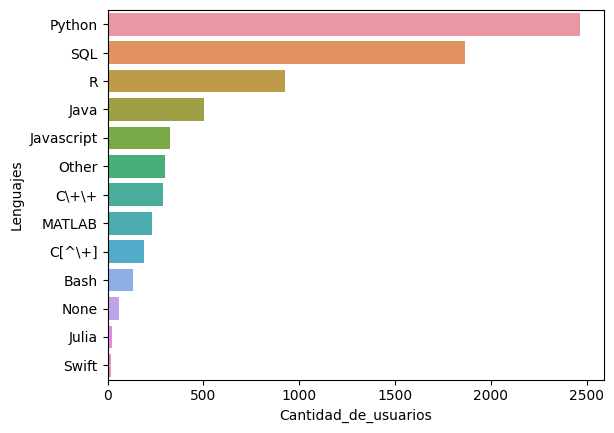

In [16]:
sns.barplot(data = df_lenguajes, x='Cantidad_de_usuarios', y = "Lenguajes"  )

VAMOS A FILTRAR POR LA COLUMNA Q8 PARA VER LOS LENGUAJES MÁS RECOMENDADOS

QUE LENGUAJES RECOMIENDAN

In [17]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [18]:
df_data["Q8"].unique()

array(['Python', 'R', 'C', 'SQL', nan, 'Java', 'C++', 'MATLAB', 'Other',
       'Julia', 'Javascript', 'Bash', 'None', 'Swift'], dtype=object)

In [50]:
df_lenguaje_recomendado = df_data["Q8"].value_counts().reset_index()
df_lenguaje_recomendado

,index,Q8
0,Python,2195
1,SQL,349
2,R,263
3,C++,39
4,Java,30
5,C,25
6,Other,24
7,MATLAB,20
8,Julia,14
9,None,14


<AxesSubplot:xlabel='index', ylabel='Q8'>

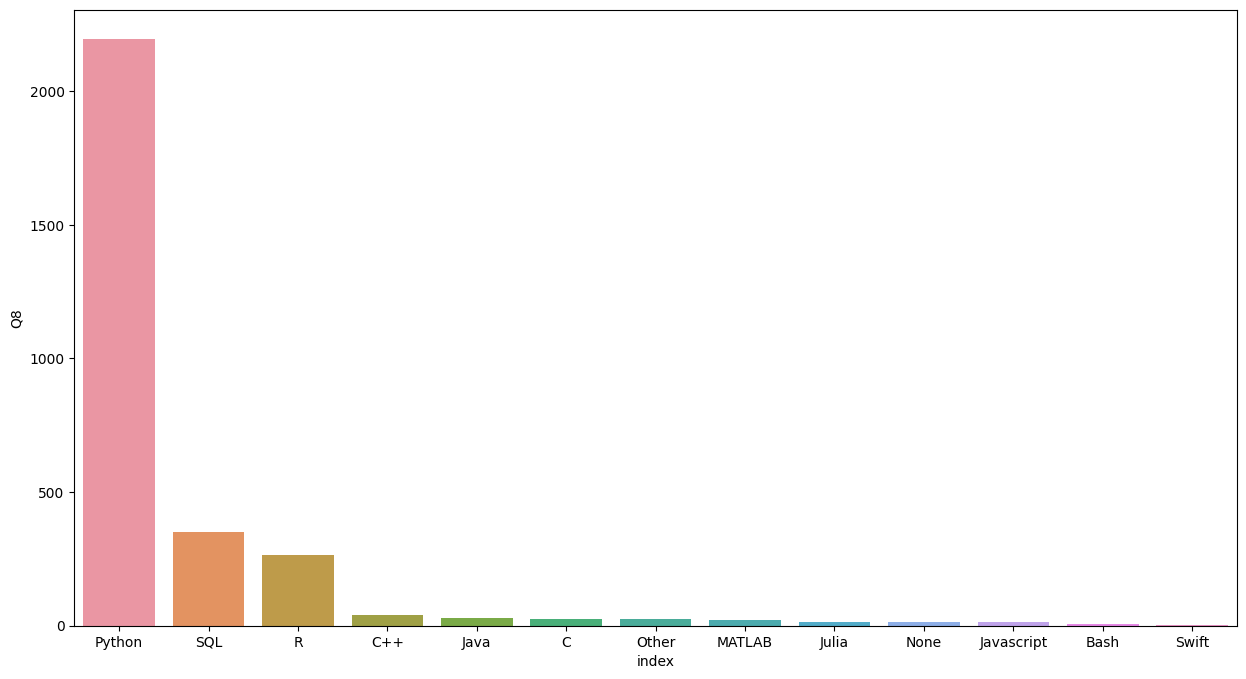

In [53]:
plt.figure(figsize = (15,8))
sns.barplot(x= "index",y = "Q8", data = df_lenguaje_recomendado)

La mayoría de analistas recomiendan empezar estudiando python y, en menor medida, SQL y R.

In [31]:
df_data["Q6"].unique()

array(['20+ years', '< 1 years', '3-5 years', '1-3 years', '5-10 years',
       'I have never written code', '10-20 years'], dtype=object)

<AxesSubplot:xlabel='Q6', ylabel='count'>

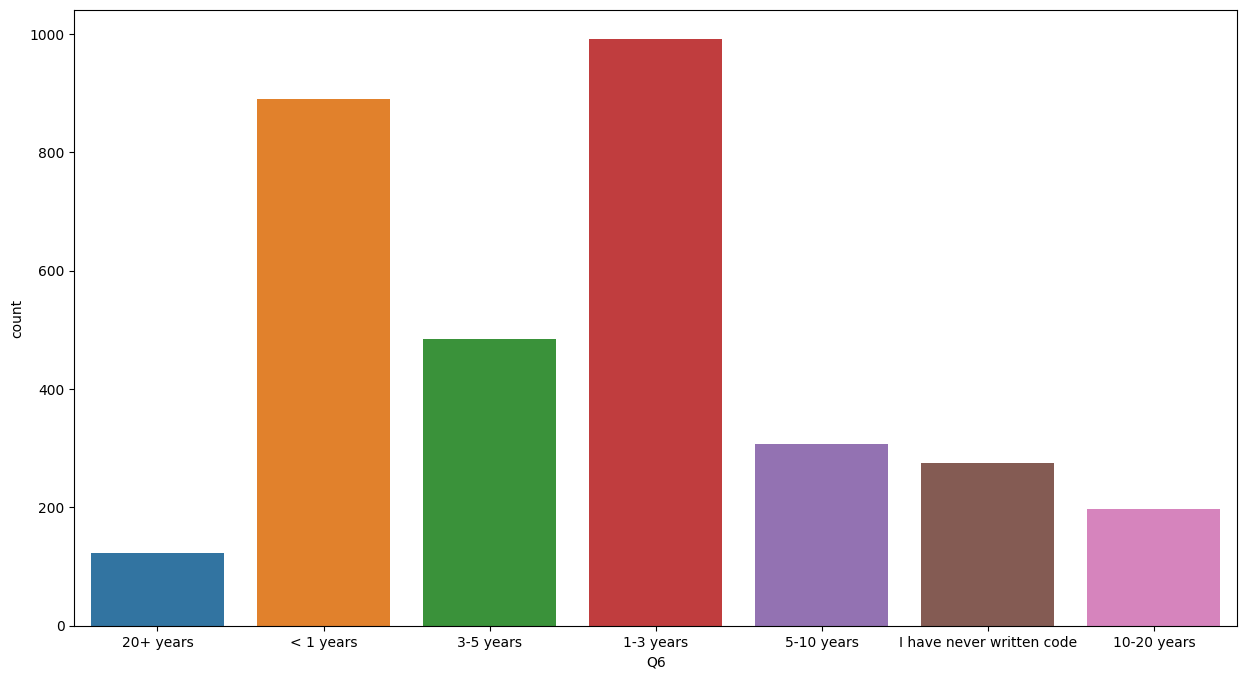

In [32]:
plt.figure(figsize = (15,8))
sns.countplot(x= df_data["Q6"], data = df_data)

Vemos que la mayoría de analistas tienen menos de 5 años de experiencia.

In [34]:
lista_entornos = ["JupyterLab", "RStudio", "Visual Studio", "Visual Studio Code \(VSCode\)", "PyCharm", "Spyder", "Notepad\+\+", "Sublime Text",
                  "Vim", "Emacs", "MATLAB", "Jupyter Notebook", "None","Other"]

In [35]:
def entornos(columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, regex = True).sum() 
        valores.append(valor)
    return valores

In [36]:
valores_entornos = entornos(df_data["Q9"], lista_entornos)

In [37]:
lista_entornos_usados = lista_entornos , valores_entornos

In [38]:
df_entornos = pd.DataFrame(lista_entornos_usados).T
df_entornos

,0,1
0,JupyterLab,634
1,RStudio,820
2,Visual Studio,1144
3,Visual Studio Code \(VSCode\),865
4,PyCharm,728
5,Spyder,476
6,Notepad\+\+,539
7,Sublime Text,259
8,Vim,86
9,Emacs,86


In [39]:
nombre_columnas = {0: "Entornos", 1: "Cantidad_de_usuarios"}

In [40]:
df_entornos.rename(columns = nombre_columnas, inplace = True)

In [46]:
df_data["Q8"].value_counts().reset_index()

,index,Q8
0,Python,2195
1,SQL,349
2,R,263
3,C++,39
4,Java,30
5,C,25
6,Other,24
7,MATLAB,20
8,Julia,14
9,None,14


In [41]:
df_entornos = df_entornos.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_entornos

,Entornos,Cantidad_de_usuarios
11,Jupyter Notebook,2149
2,Visual Studio,1144
3,Visual Studio Code \(VSCode\),865
1,RStudio,820
4,PyCharm,728
0,JupyterLab,634
6,Notepad\+\+,539
5,Spyder,476
7,Sublime Text,259
10,MATLAB,166


<AxesSubplot:xlabel='Cantidad_de_usuarios', ylabel='Lenguajes'>

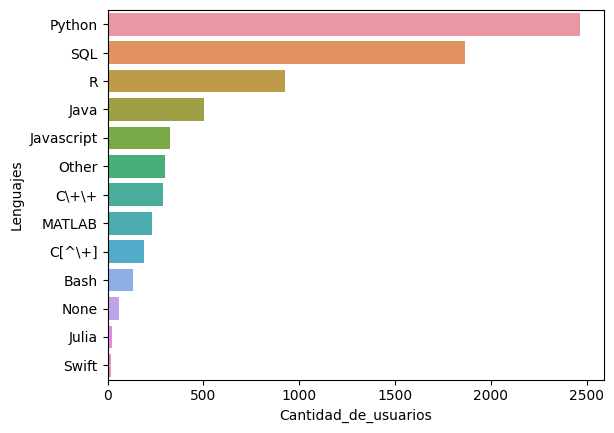

In [42]:
sns.barplot(data = df_lenguajes, x='Cantidad_de_usuarios', y = "Lenguajes"  )

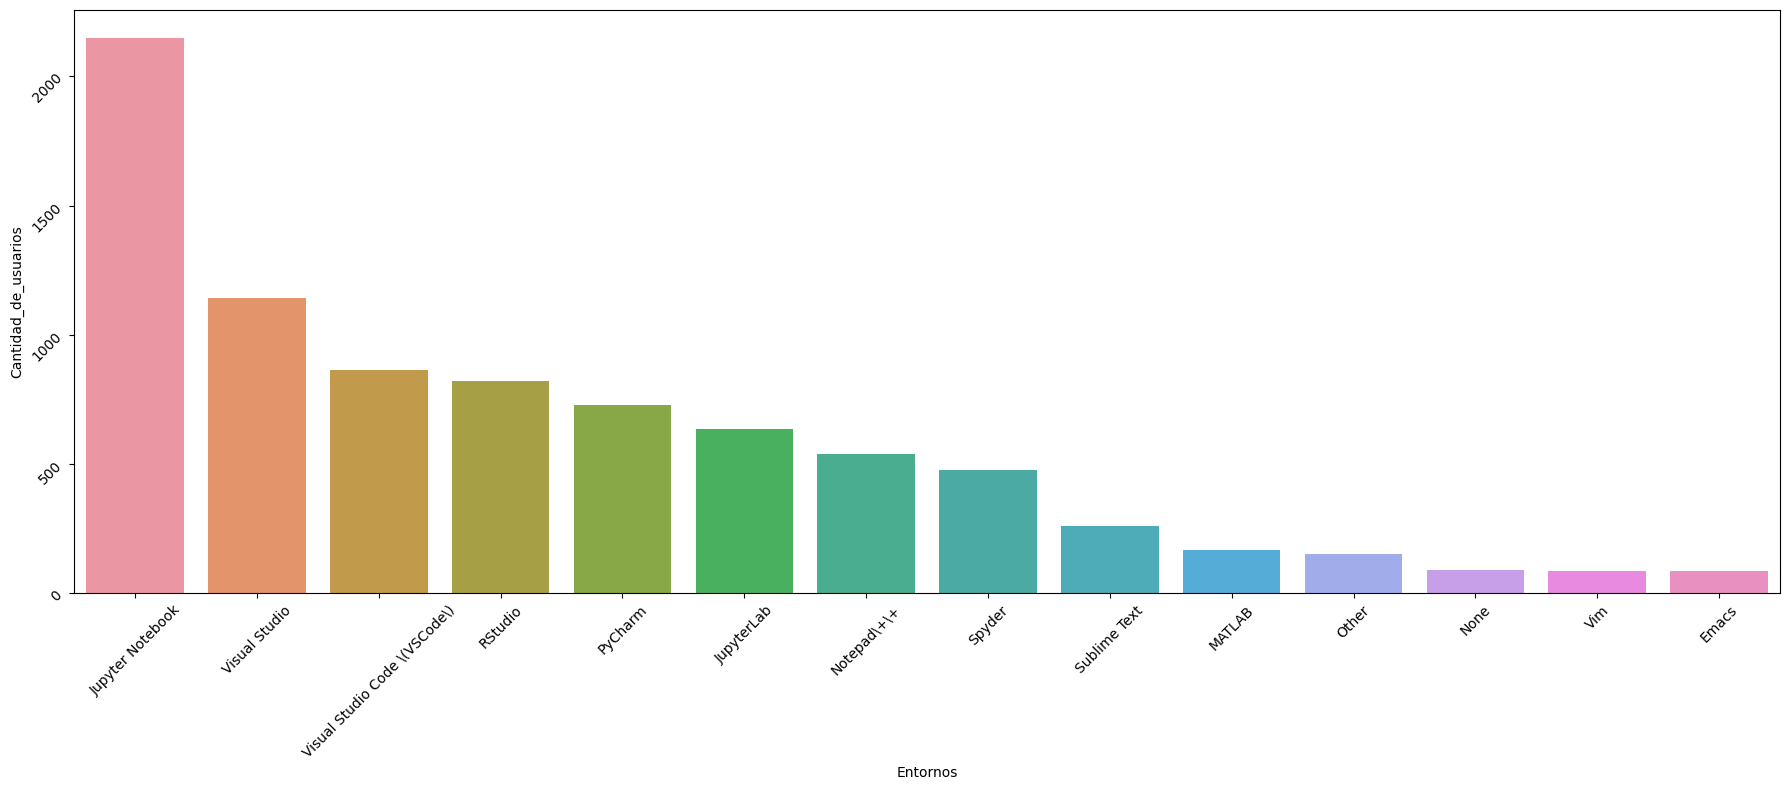

In [43]:
plt.figure(figsize = (18,8))
sns.barplot(x= "Entornos", y = "Cantidad_de_usuarios", data = df_entornos)
plt.tick_params(rotation = 45)
plt.tight_layout()

In [54]:
df.head()

,index,Q3,Q4,Q5,Q6,Q8,Q15,Q20,Q21,Q23,Q25,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q34,age,gender,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER
0,0,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,No (we do not use ML methods),"25,000-29,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,None,50-54,Man,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"60,000-69,999",NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,50-54,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MySQL,NaN,SQLite,Oracle Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Data Studio,NaN,NaN,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",I do not know,$0-999,MySQL,NaN,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,None,22-24,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,MySQL,PostgreSQL,NaN,NaN,MongoDB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Mexico,Doctoral degree,Research Scientist,20+ years,Python,5-10 years,Academics/Education,"1000-9,999 employees",I do not know,"30,000-39,999",NaN,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,45-49,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,4,India,Doctoral degree,Other,< 1 years,Python,10-20 years,Academics/Education,50-249 employees,We use ML methods for generating insights (but...,"30,000-39,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,Microsoft Power BI,45-49,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. renombrar columnas
2. sustituir valores por 1 y 0
3. hacer un sum() de los valores 
4. crear un dataframe con los valores totales
5 hacer grafico (barplot, X = Q34, y = valores)